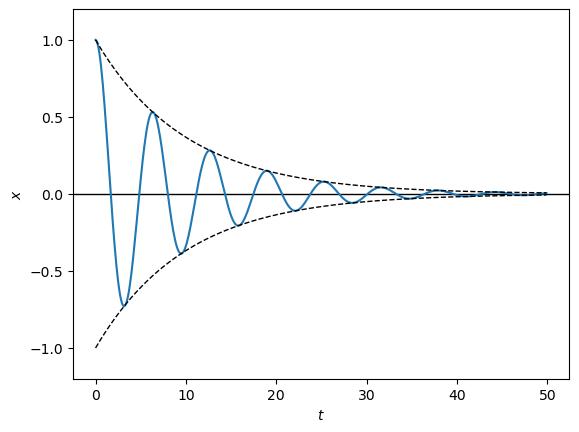

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intgr

def damped(X, t, omega0, gamma):
    x, v = X    # unpack variables
    dxdt = v
    dvdt = - omega0**2 * x - gamma * v
    dXdt = [dxdt, dvdt]    
    return dXdt
# set parameters
omega0 = 1    
gamma = 0.2

x0 = 1
v0 = 0

time = np.arange(0, 50, 0.1)    
sol = intgr.odeint(damped, [x0, v0], time, args=(omega0, gamma))
xt = sol[:,0]    

plt.figure()
plt.axhline(0, lw=1, color='k')
plt.plot(time, xt)
plt.plot(time, np.exp(-gamma/2*time), 'k--', lw=1)    
plt.plot(time, -np.exp(-gamma/2*time), 'k--', lw=1)    
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.show()

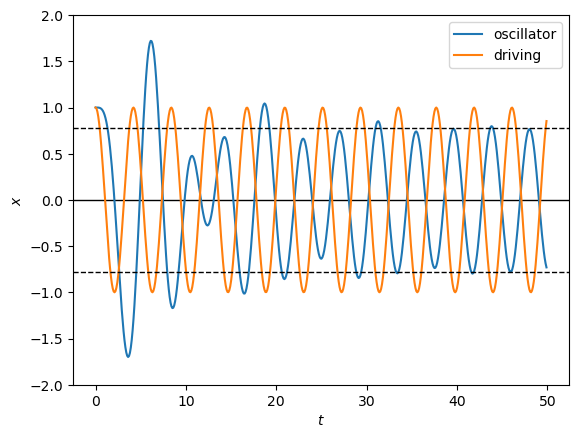

In [2]:
def driven(X, t, omega0, gamma, xi, omega):
    x, v = X    
    dxdt = v
    dvdt = - omega0**2 * x - gamma * v + xi * np.cos(omega*t)
    dXdt = [dxdt, dvdt]    
    return dXdt

# set parameters
omega0 = 1
gamma = 0.2
xi = 1
omega = 1.5

x0 = 1
v0 = 0

time = np.arange(0, 50, 0.1)    
sol = intgr.odeint(driven, [x0, v0], time, args=(omega0, gamma, xi, omega))
xt = sol[:,0]    

amp = xi / np.sqrt((omega0**2 - omega**2)**2 + gamma**2 * omega**2)    

plt.figure()
plt.axhline(0, lw=1, color='k')
plt.plot(time, xt, label='oscillator')
plt.plot(time, xi*np.cos(omega*time), label='driving')
plt.axhline(amp, lw=1, ls='--', color='k')
plt.axhline(-amp, lw=1, ls='--', color='k')
plt.ylim(-2, 2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.legend()
plt.show()